## 1. Import libraries & dataframe

In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
# import dataframe
path = r'C:\Users\muril\Data Analysis Projects\07-2023 Instacart Basket Analysis\02 Data'
df = pd.read_pickle(os.path.join(path,'Prepared Data','instacart_wrangled.pkl'))

In [3]:
# visual check of dataframe
df.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,sex,state,age,date_joined,n_dependents,family_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Female,Alabama,31,2/17/2019,3,married,40423


## 4. Regional Analysis

### 4.1 Import and merge regions to dataframe

In [4]:
# import regions dataframe
regions = pd.read_csv(os.path.join(path,'Original Data','regions.csv'))

In [5]:
# visual check of regions
regions

,state,state_code,region,division
0,Alaska,AK,West,Pacific
1,Alabama,AL,South,East South Central
2,Arkansas,AR,South,West South Central
3,Arizona,AZ,West,Mountain
4,California,CA,West,Pacific
5,Colorado,CO,West,Mountain
6,Connecticut,CT,Northeast,New England
7,District of Columbia,DC,South,South Atlantic
8,Delaware,DE,South,South Atlantic
9,Florida,FL,South,South Atlantic


In [6]:
# drop unnecessary columns
regions = regions.drop('state_code', axis=1)

In [7]:
regions = regions.drop('division', axis=1)

In [8]:
# check frequencies of regions as check
regions['region'].value_counts()

South        17
West         13
Midwest      12
Northeast     9
Name: region, dtype: int64

Frequencies are correct.

In [9]:
# merge regions to main dataframe
df_merged = df.merge(regions, on='state', how='left')

In [10]:
# visual check on dataframe
df_merged.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,department_id,prices,sex,state,age,date_joined,n_dependents,family_status,income,region
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,7,9.0,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,7,9.0,Female,Alabama,31,2/17/2019,3,married,40423,South
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,7,9.0,Female,Alabama,31,2/17/2019,3,married,40423,South
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,7,9.0,Female,Alabama,31,2/17/2019,3,married,40423,South
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,7,9.0,Female,Alabama,31,2/17/2019,3,married,40423,South


In [11]:
# check lengths of dataframes
df_merged.shape

(32433030, 21)

In [12]:
df.shape

(32433030, 20)

Lengths are correct.

In [13]:
# check for nulls
df_merged['region'].isnull().sum()

0

In [14]:
# check frequencies
df_merged['region'].value_counts()

South        10801195
West          8300141
Midwest       7603550
Northeast     5728144
Name: region, dtype: int64

### 4.2 Analyse spending habits by region

#### 4.2.1 Plot bar charts

In [15]:
# import matplotlib
import matplotlib.pyplot as plt

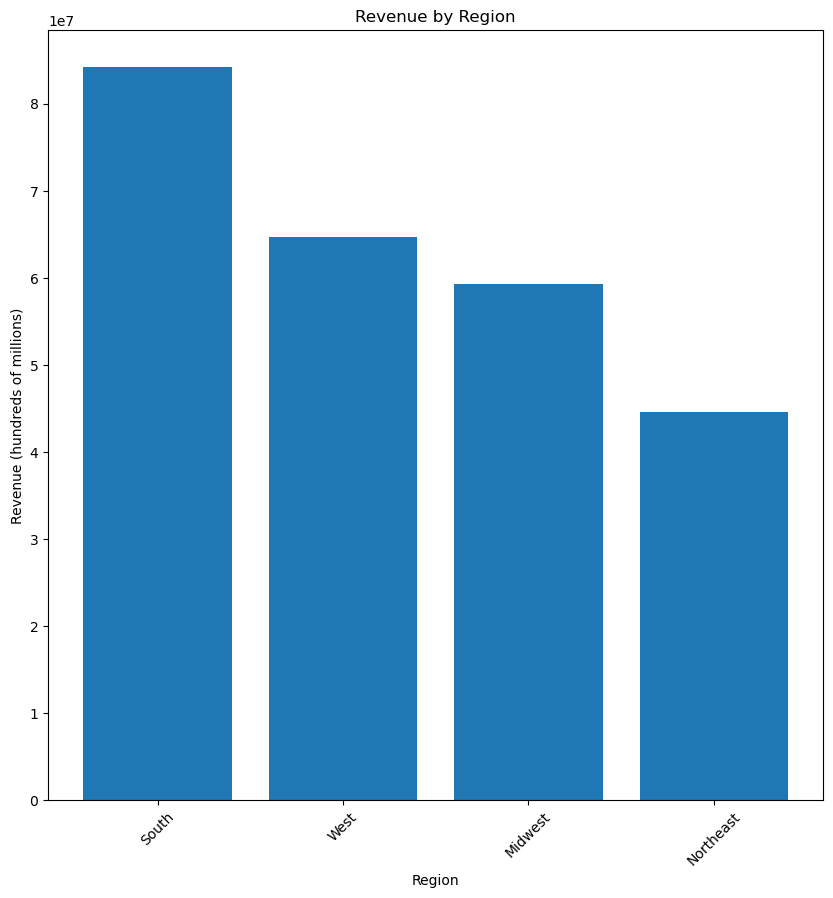

In [16]:
# draw bar chart of sum of prices by region

# Calculate the sum of prices by region
sum_prices = df_merged.groupby('region')['prices'].sum()

# Sort the revenue in descending order
sum_prices = sum_prices.sort_values(ascending=False)

# Create a bar chart
plt.bar(sum_prices.index, sum_prices.values)

# Set labels and title
plt.xlabel('Region')
plt.ylabel('Revenue (hundreds of millions)')
plt.title('Revenue by Region')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Adjust figure size and resolution
fig = plt.gcf()
fig.set_size_inches(10, 10)

# Save the chart as a PNG file
plt.savefig(path)

# Display the chart
plt.show()

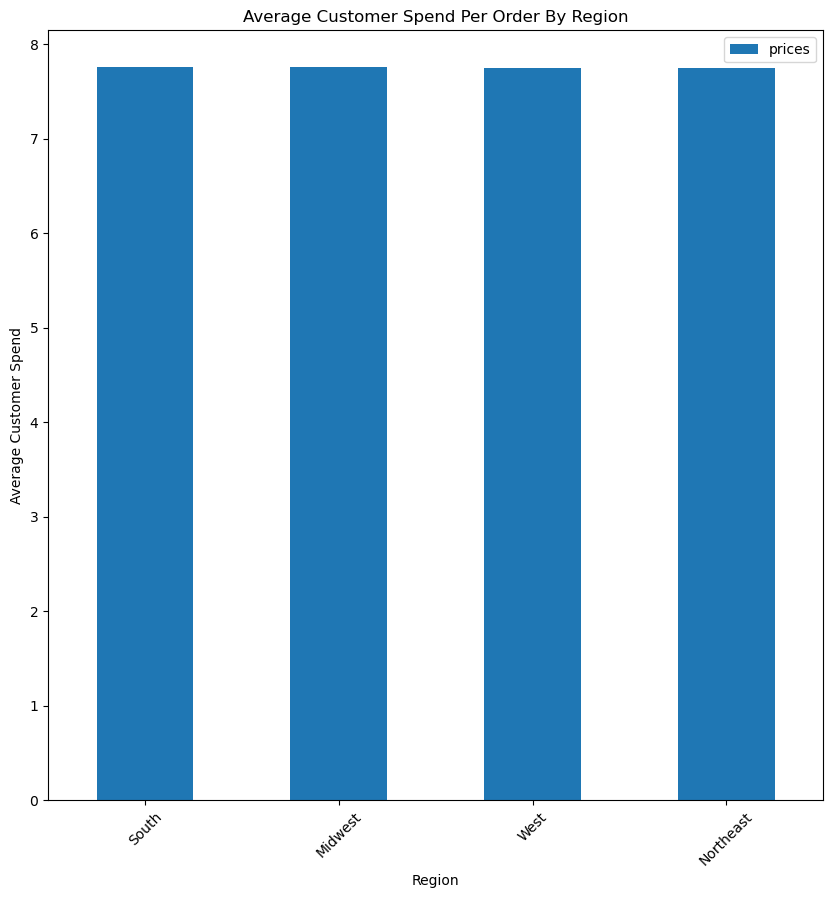

In [17]:
# Plot bar chart of average revenue per customer by region

# Calculate the average spend per customer by region
avg_prices_pp = df_merged.groupby(['user_id', 'region'])['prices'].mean().reset_index()
avg_region_pp = avg_prices_pp.groupby('region')['prices'].mean().reset_index()

# Sort the DataFrame by prices in descending order
avg_region_pp_sorted = avg_region_pp.sort_values(by='prices', ascending=False)

# Plot bar chart
avg_region_pp_sorted.plot.bar(x='region', y='prices')

# Set labels and title
plt.xlabel('Region')
plt.ylabel('Average Customer Spend')
plt.title('Average Customer Spend Per Order By Region')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Adjust figure size and layout
fig = plt.gcf()
fig.set_size_inches(10, 10)

# Save the chart as a PNG file
plt.savefig(path)

# Display the chart
plt.show()

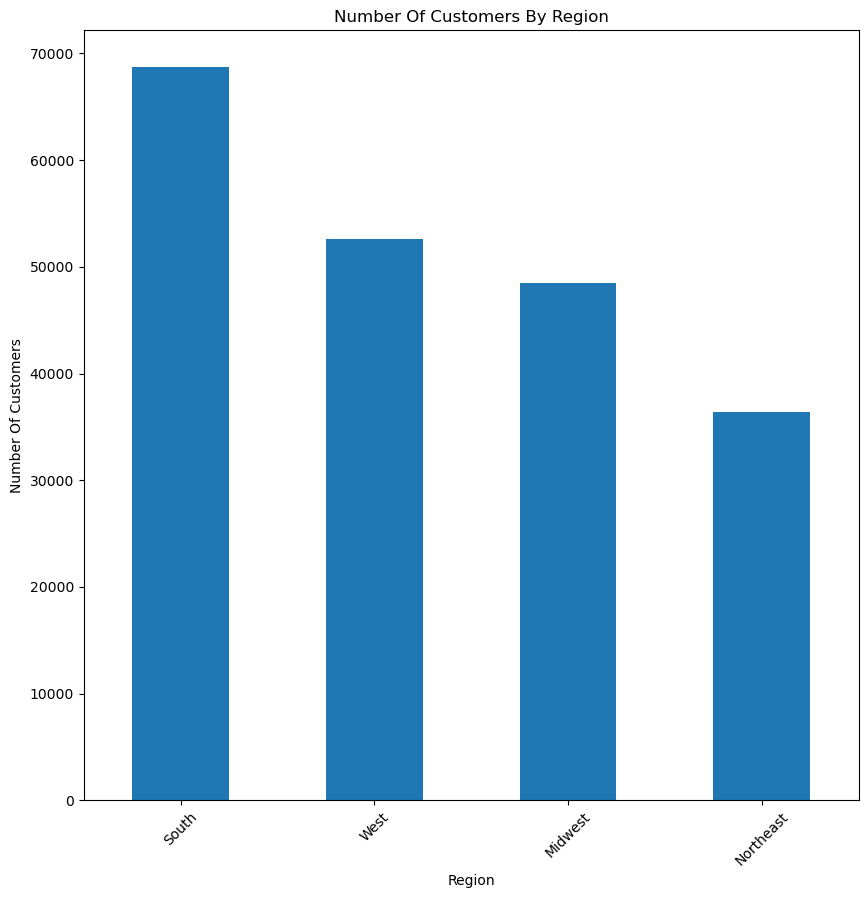

In [18]:
# Group the data by region and count the number of user_ids
region_counts = avg_prices_pp.groupby('region')['user_id'].count()

# Sort the values in descending order
region_counts_sorted = region_counts.sort_values(ascending=False)

# Plot bar chart
region_counts_sorted.plot.bar()

# Set labels and title
plt.xlabel('Region')
plt.ylabel('Number Of Customers')
plt.title('Number Of Customers By Region')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Adjust figure size and layout
fig = plt.gcf()
fig.set_size_inches(10, 10)

# Save the chart as a PNG file
plt.savefig(path)

# Display the chart
plt.show()


#### 4.2.2 Hypothesis testing by average customer spend

In [19]:
# import stats library
import scipy.stats as stats

In [20]:
# Test whether the average spend per customer in the Midwest is significantly different from the global average

# Extract the spend values for the Midwest region
midwest_spend = avg_prices_pp[avg_prices_pp['region'] == 'Midwest']['prices']

# Calculate the global average spend
global_average_spend = avg_prices_pp['prices'].mean()

# Perform the t-test
t_statistic, p_value = stats.ttest_1samp(midwest_spend, global_average_spend,alternative='two-sided')

# Set the significance level
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("The average spend by the Midwest region is statistically different from the global average spend.")
else:
    print("The average spend by the Midwest region is not statistically different from the global average spend.")

The average spend by the Midwest region is not statistically different from the global average spend.


In [21]:
# Test whether the average spend per customer in the South is significantly different than the global average

# Extract the spend values for the Southern region
south_spend = avg_prices_pp[avg_prices_pp['region'] == 'South']['prices']

# Perform the t-test
t_statistic, p_value = stats.ttest_1samp(south_spend, global_average_spend, alternative='two-sided')

# Set the significance level
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("The average spend by the Southern region is statistically different from the global average spend.")
else:
    print("The average spend by the Southern region is not statistically different from the global average spend.")

The average spend by the Southern region is not statistically different from the global average spend.


In [22]:
# Test whether the average spend per customer in the Northeast is significantly different than the global average

# Extract the spend values for the Northeast region
northeast_spend = avg_prices_pp[avg_prices_pp['region'] == 'Northeast']['prices']

# Perform the t-test
t_statistic, p_value = stats.ttest_1samp(northeast_spend, global_average_spend, alternative='two-sided')

# Set the significance level
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("The average spend by the Northeastern region is statistically different from the global average spend.")
else:
    print("The average spend by the Northeastern region is not statistically different from the global average spend.")

The average spend by the Northeastern region is not statistically different from the global average spend.


In [23]:
# Test whether the average spend per customer in the West is significantly different than the global average

# Extract the spend values for the Western region
west_spend = avg_prices_pp[avg_prices_pp['region'] == 'West']['prices']

# Perform the t-test
t_statistic, p_value = stats.ttest_1samp(west_spend, global_average_spend, alternative='two-sided')

# Set the significance level
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("The average spend by the Western region is statistically different from the global average spend.")
else:
    print("The average spend by the Western region is not statistically different from the global average spend.")

The average spend by the Western region is not statistically different from the global average spend.


#### 4.2.3 Conclusion on regional differences

The revenue in the South is significantly higher than the other regions and the lowest in the Northeast by a significant margin. The descending order of regions by revenue is South, Midwest, West, North.

However, when analysing by average spend per customer, the order changes to Midwest, South, West, Northeast and the average spend figures are very similar. Hypothesis testing this using a t-test shows that the regional average spending per customer is not significantly different from the global average spending per customer.

Plotting the number of customers by region shows the same trend as revenue by region. The South has the most amount of customers by far, the West and Mid-West have roughly the same number of customers in the middle and the Northeast has the fewest number of customers. This suggests that the spending habits of the customers by region are much the same and the difference in regional revenue is driven simply by amounts of customers in each region.

## 5 High vs Low Activity Customers

### 5.1 Low Activity Flag Creation

Define "low activity" as fewer than 5 orders


In [24]:
del regions

In [25]:
del df

In [26]:
subset = df_merged.groupby('user_id')['order_id'].nunique().reset_index(name='number_of_orders')

In [27]:
# check subset dataframe
subset

,user_id,number_of_orders
0,1,10
1,2,14
2,3,12
3,4,5
4,5,4
...,...,...
206204,206205,3
206205,206206,67
206206,206207,16
206207,206208,49


In [28]:
# count the number of user_id with fewer than 5 orders
subset[subset['number_of_orders'] < 5]['number_of_orders'].count()

43577

In [29]:
# merge this subset with the dataframe
df_joined = pd.merge(df_merged, subset, on='user_id', how='inner')

In [30]:
# visual check of df_joined
df_joined.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,prices,sex,state,age,date_joined,n_dependents,family_status,income,region,number_of_orders
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,9.0,Female,Alabama,31,2/17/2019,3,married,40423,South,10
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,9.0,Female,Alabama,31,2/17/2019,3,married,40423,South,10
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,9.0,Female,Alabama,31,2/17/2019,3,married,40423,South,10
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,9.0,Female,Alabama,31,2/17/2019,3,married,40423,South,10
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,9.0,Female,Alabama,31,2/17/2019,3,married,40423,South,10


In [31]:
# create activity_status flag
df_joined['activity_status'] = df_joined['number_of_orders'].apply(lambda x: 'low' if x < 5 else 'high')

In [32]:
# visual check of df_joined
df_joined.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,sex,state,age,date_joined,n_dependents,family_status,income,region,number_of_orders,activity_status
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,10,high
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,10,high
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,10,high
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,10,high
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,10,high


In [33]:
# check the counts of the flags
df_joined['activity_status'].value_counts()

high    30991533
low      1441497
Name: activity_status, dtype: int64

In [34]:
df_joined.shape

(32433030, 23)

The frequencies of the flags match the size of the dataframe.

### 5.2 Create and export subsets of high and low activity customers

In [35]:
# create subsets of high activity customers
df_high = df_joined[df_joined['activity_status'] == 'high']

In [36]:
# visual check of df_high
df_high.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,sex,state,age,date_joined,n_dependents,family_status,income,region,number_of_orders,activity_status
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,10,high
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,10,high
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,10,high
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,10,high
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,10,high


In [37]:
# create subsets of low activity customers
df_low = df_joined[df_joined['activity_status'] == 'low']

In [38]:
# visual check of df_low
df_low.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,sex,state,age,date_joined,n_dependents,family_status,income,region,number_of_orders,activity_status
1513,520620,120,1,3,11,NaN,196,2,0,Soda,...,Female,Kentucky,54,3/2/2017,2,married,99219,South,3,low
1514,3273029,120,3,2,8,19.0,196,2,1,Soda,...,Female,Kentucky,54,3/2/2017,2,married,99219,South,3,low
1515,520620,120,1,3,11,NaN,46149,1,0,Zero Calorie Cola,...,Female,Kentucky,54,3/2/2017,2,married,99219,South,3,low
1516,3273029,120,3,2,8,19.0,46149,1,1,Zero Calorie Cola,...,Female,Kentucky,54,3/2/2017,2,married,99219,South,3,low
1517,520620,120,1,3,11,NaN,26348,3,0,Mixed Fruit Fruit Snacks,...,Female,Kentucky,54,3/2/2017,2,married,99219,South,3,low


In [39]:
# export dataframes
df_high.to_pickle(os.path.join(path,'Prepared Data','high_activity_customers.pkl'))
df_low.to_pickle(os.path.join(path,'Prepared Data','low_activity_customers.pkl'))